<a href="https://colab.research.google.com/github/beertocode/captchasolver/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.3.0


In [7]:
pip install tensorflow==1.10.0

     |████████████████████████████████| 58.4MB 72kB/s 
     |████████████████████████████████| 573kB 37.6MB/s 
     |████████████████████████████████| 12.2MB 35.6MB/s 
     |████████████████████████████████| 3.3MB 40.4MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: tifffile 2020.7.24 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: numba 0.48.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: imgaug 0.2.9 has requirement nump

In [2]:
import tensorflow as tf

In [38]:
print(tf.__version__)

1.10.0


In [39]:
mnist=tf.keras.datasets.mnist

In [40]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [41]:
import matplotlib.pyplot as plt
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

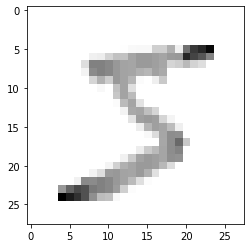

In [42]:

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [43]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 7s 117us/step - loss: 0.2649 - acc: 0.9235
Epoch 2/3
60000/60000 [==============================] - 7s 109us/step - loss: 0.1080 - acc: 0.9656
Epoch 3/3
60000/60000 [==============================] - 7s 111us/step - loss: 0.0738 - acc: 0.9768


In [45]:
val_loss, val_acc=model.evaluate(x_test,y_test)
print(val_loss, "  :  ", val_acc)

10000/10000 [==============================] - 0s 29us/step
0.09437248038426041   :   0.9716


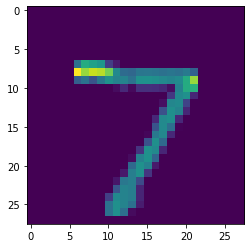

In [46]:
plt.imshow(x_test[0])
plt.show()

In [50]:
model.save('md.model')
new_model=tf.keras.models.load_model('md.model')

In [53]:
predictions=new_model.predict([x_test])
print(predictions)

[[2.5428873e-10 2.1753602e-08 2.6938590e-06 ... 9.9998808e-01
  1.9914538e-08 9.0856850e-07]
 [4.8984052e-09 2.8534163e-05 9.9997079e-01 ... 1.4201790e-09
  1.3609309e-09 5.6018731e-13]
 [2.0453443e-09 9.9992967e-01 2.9911784e-05 ... 2.3416202e-05
  1.5018030e-05 1.3972786e-07]
 ...
 [2.2360465e-10 1.4215212e-06 2.3049405e-07 ... 5.3955788e-05
  1.7869379e-06 6.3634932e-04]
 [2.1661099e-06 1.0996150e-06 3.3289712e-06 ... 6.3617654e-07
  2.0246970e-02 4.3586135e-07]
 [4.1161670e-06 7.3575657e-06 1.0353828e-05 ... 6.4841116e-10
  3.0466521e-07 2.5556188e-09]]


In [54]:
import numpy as np

In [56]:
print(np.argmax(predictions[0]))

7


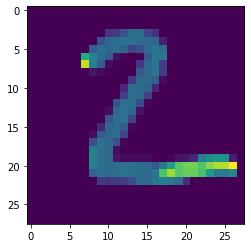

In [57]:
plt.imshow(x_test[1])

In [58]:
print(np.argmax(predictions[1]))

2
